<a href="https://colab.research.google.com/github/Ailla19/Mendoza_CSST104-3A/blob/main/3A_EXER8_Mendoza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Preparation

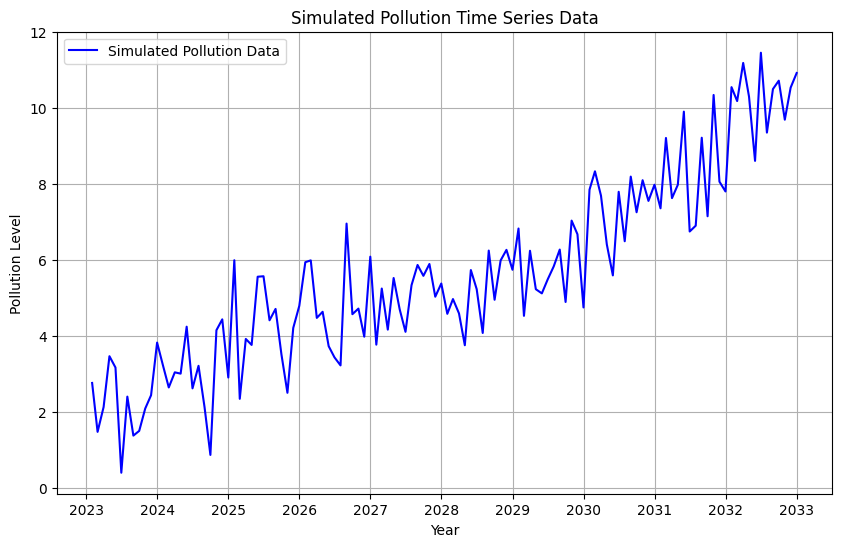

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.read_csv('/content/most-polluted-countries.csv')

np.random.seed(0)
num_years = 10
num_obs_per_year = 12

trend = np.linspace(1, num_years, num=num_years*num_obs_per_year)
seasonality = np.sin(np.linspace(0, 2*np.pi, num=num_obs_per_year))
noise = np.random.normal(loc=0, scale=1, size=num_years*num_obs_per_year)
pollution_levels = trend + seasonality.repeat(num_years) + noise

start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2032-12-31')
date_range = pd.date_range(start=start_date, end=end_date, freq='M')

time_series = pd.DataFrame({'Pollution': pollution_levels}, index=date_range)

plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series['Pollution'], label='Simulated Pollution Data', color='blue')
plt.title('Simulated Pollution Time Series Data')
plt.xlabel('Year')
plt.ylabel('Pollution Level')
plt.legend()
plt.grid(True)
plt.show()


Stationarity Testing

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Pollution'])
adf_statistic = result[0]
p_value = result[1]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

if p_value < 0.05:
    print('Reject the null hypothesis (H0): The time series is stationary.')
else:
    print('Fail to reject the null hypothesis (H0): The time series is not stationary.')

ADF Statistic: -1.0191603655011152
p-value: 0.7462120106736234
Fail to reject the null hypothesis (H0): The time series is not stationary.


ARIMA Model Identification

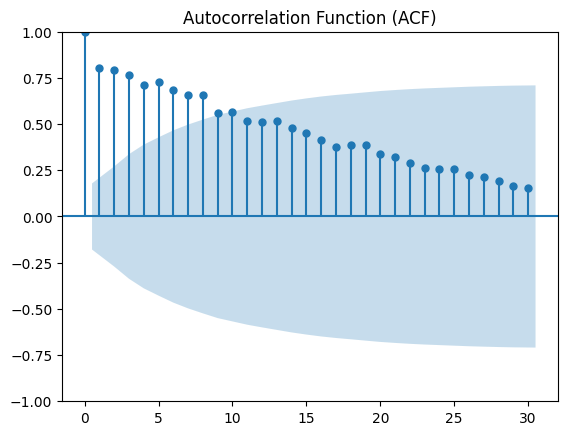

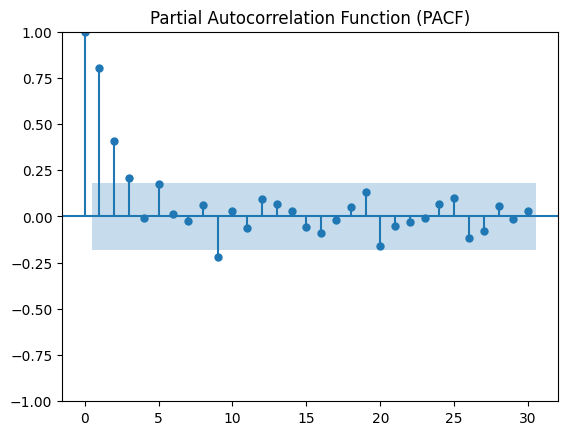

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(time_series['Pollution'], lags=30)
plt.title('Autocorrelation Function (ACF)')
plt.show()


plot_pacf(time_series['Pollution'], lags=30)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

ARIMA Model Fitting

                               SARIMAX Results                                
Dep. Variable:              Pollution   No. Observations:                  120
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -182.376
Date:                Wed, 27 Mar 2024   AIC                            370.753
Time:                        16:34:05   BIC                            379.090
Sample:                    01-31-2023   HQIC                           374.138
                         - 12-31-2032                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1267      0.118     -1.073      0.283      -0.358       0.105
ma.L1         -0.7037      0.089     -7.951      0.000      -0.877      -0.530
sigma2         1.2460      0.178      6.997      0.0

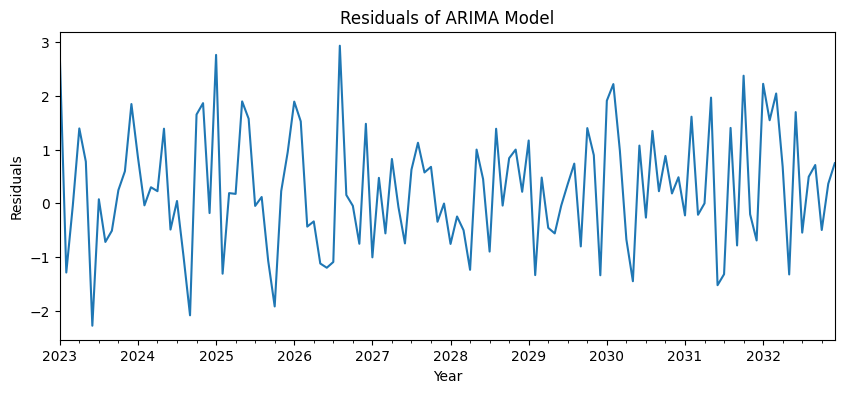

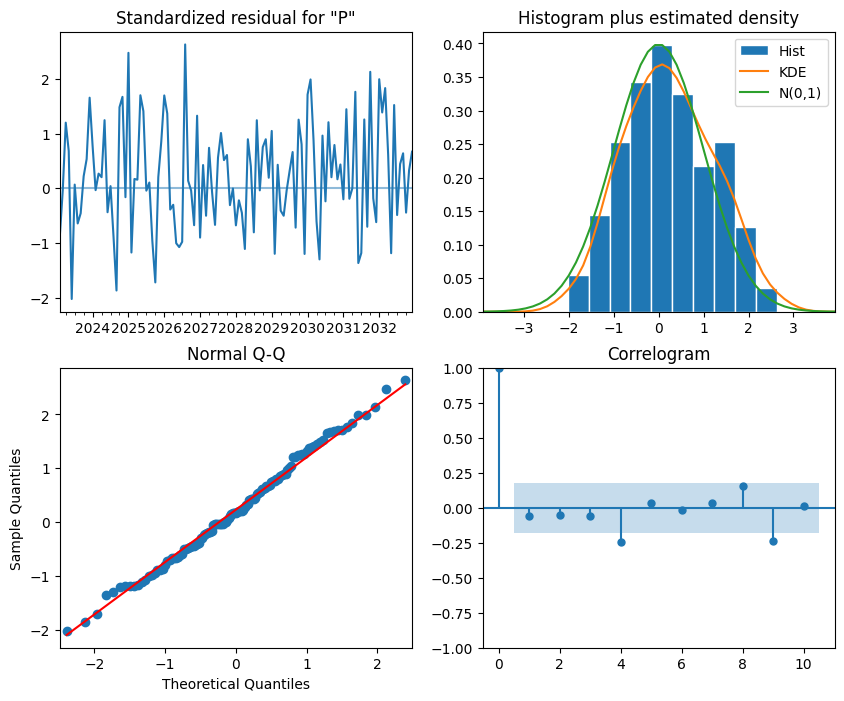

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

p = 1  # Autoregressive order
d = 1  # Integrated order (degree of differencing)
q = 1  # Moving average order

model = ARIMA(time_series['Pollution'], order=(p, d, q))
fit_model = model.fit()

print(fit_model.summary())

residuals = pd.Series(fit_model.resid, index=time_series.index)
residuals.plot(figsize=(10, 4))
plt.title('Residuals of ARIMA Model')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.show()

fit_model.plot_diagnostics(figsize=(10, 8))
plt.show()

Forecasting

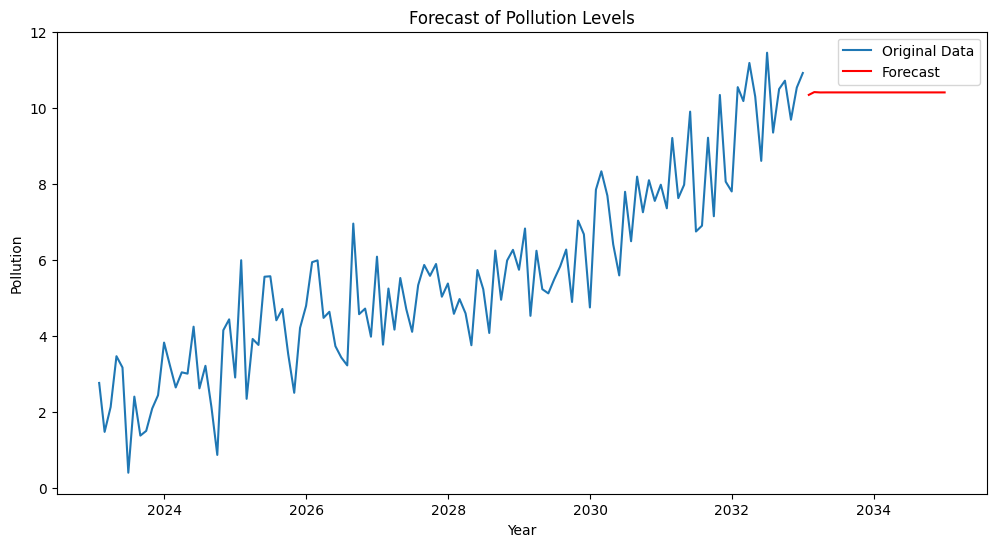

In [ ]:
forecast_values = fit_model.forecast(steps=24)
forecast_dates = pd.date_range(start=time_series.index[-1], periods=25, freq='M')[1:]

plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series['Pollution'], label='Original Data')
plt.plot(forecast_dates, forecast_values, color='red', label='Forecast')
plt.title('Forecast of Pollution Levels')
plt.xlabel('Year')
plt.ylabel('Pollution')
plt.legend()
plt.show()



Report and Insights

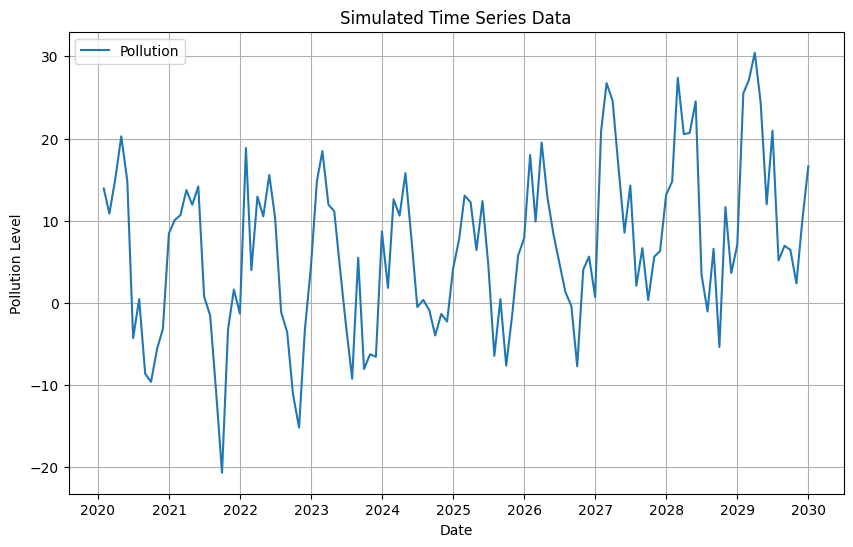

ADF Statistic: 1.4069956450559398
p-value: 0.9971456914223097
Critical Values:
1%: -3.4936021509366793
5%: -2.8892174239808703
10%: -2.58153320754717


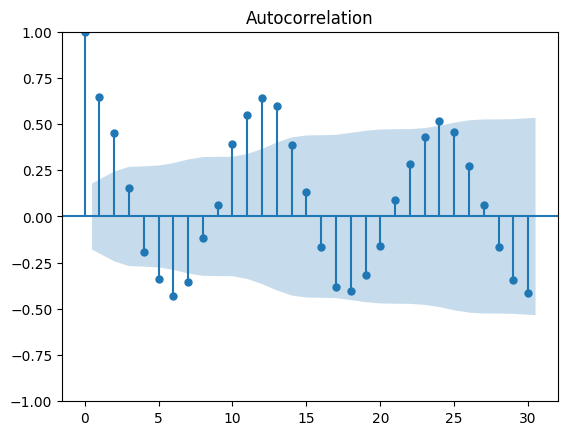

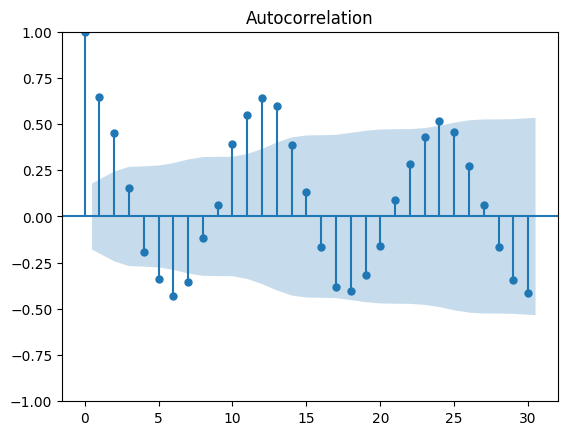

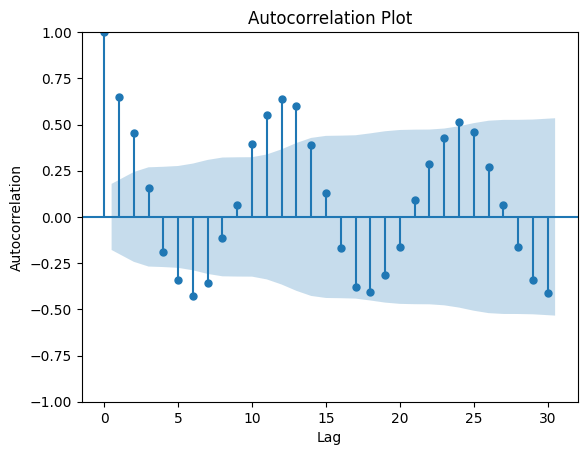

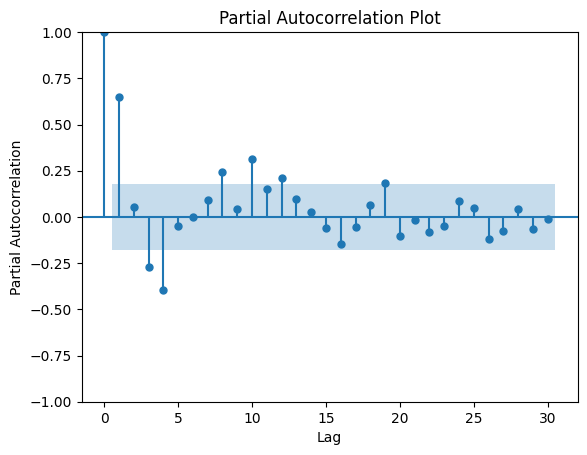

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


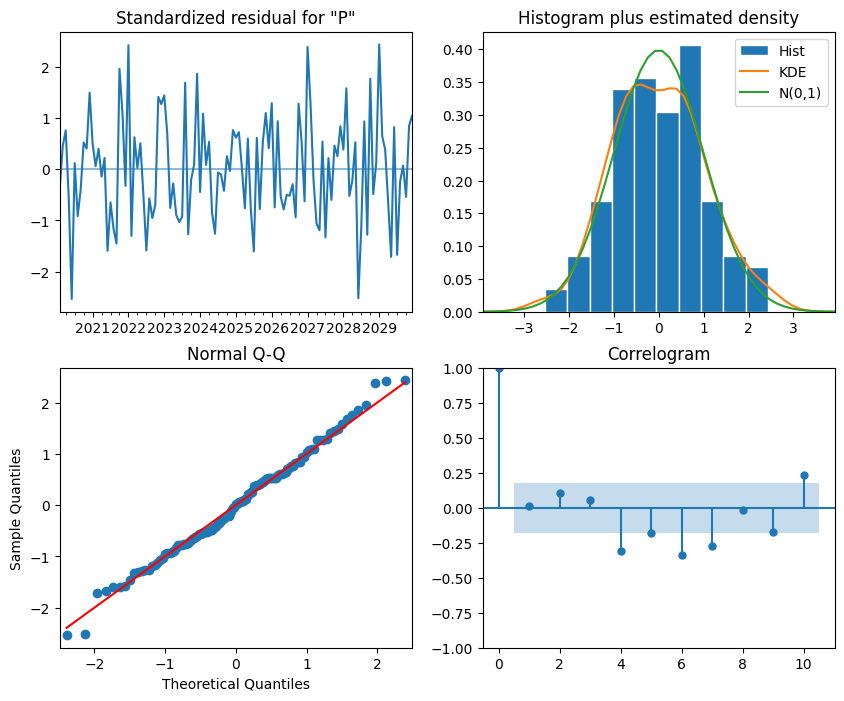

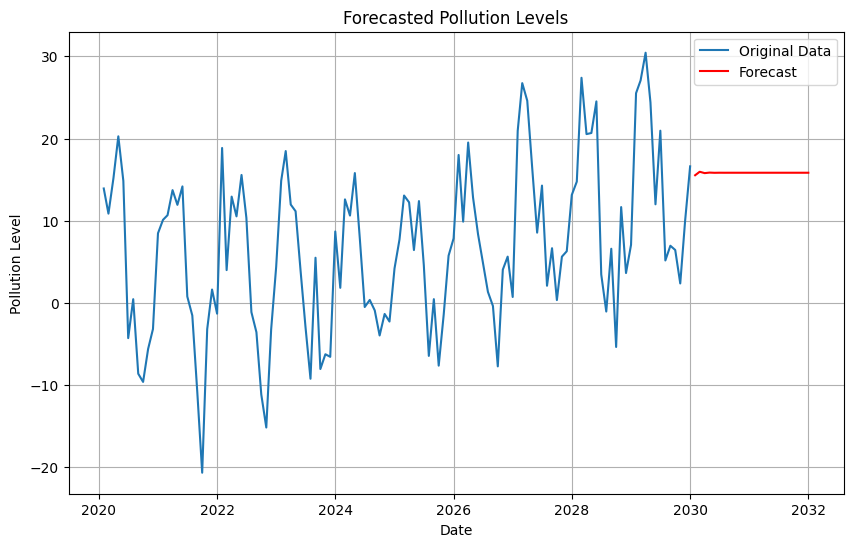

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

np.random.seed(0)
dates = pd.date_range(start='1/1/2020', periods=120, freq='M')
trend = 0.1 * np.arange(1, 121)  # Linear trend
seasonality = 10 * np.sin(2 * np.pi * np.arange(1, 121) / 12)  # Seasonal component
noise = np.random.normal(0, 5, size=120)  # Random noise
pollution = trend + seasonality + noise

data = pd.DataFrame({'Date': dates, 'Pollution': pollution})
data.set_index('Date', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Pollution'], label='Pollution')
plt.title('Simulated Time Series Data')
plt.xlabel('Date')
plt.ylabel('Pollution Level')
plt.legend()
plt.grid(True)
plt.show()

result = adfuller(data['Pollution'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

    plot_acf(data['Pollution'], lags=30)
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

plot_pacf(data['Pollution'], lags=30)
plt.title('Partial Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

model = ARIMA(data['Pollution'], order=(1, 1, 1))
fit_model = model.fit()

fit_model.plot_diagnostics(figsize=(10, 8))
plt.show()

forecast_values = fit_model.forecast(steps=24)
forecast_index = pd.date_range(start=data.index[-1], periods=25, freq='M')[1:]
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Pollution'], label='Original Data')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.title('Forecasted Pollution Levels')
plt.xlabel('Date')
plt.ylabel('Pollution Level')
plt.legend()
plt.grid(True)
plt.show()